<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

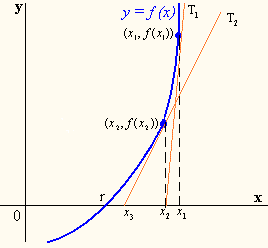

**Carga de librerías**

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from sympy import diff
from sympy import sin
from sympy import cos
from scipy.misc import derivative

**Ingreso valor inicial**

In [3]:
x0  = float(input("Ingrese valor inicial x0 "))
err = float(input("Ingrese valor del error aceptable "))

Ingrese valor inicial x0 2
Ingrese valor del error aceptable 0.001


**Grafica de f(x)  = 2*sen(x= - x^2/10**


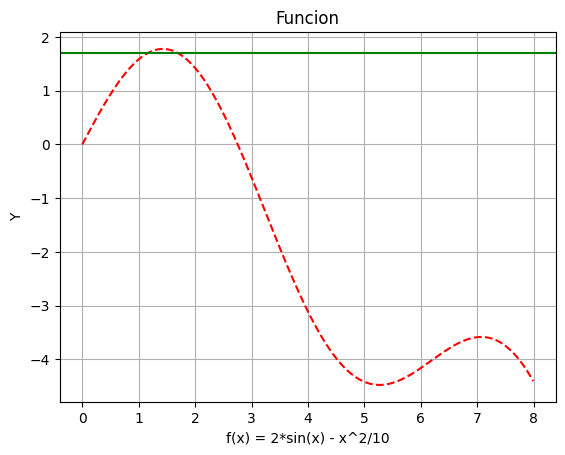

In [4]:
xl = 0
xu = 8

def graf_f():
  X = list(np.arange(xl, xu, 0.01))
  Y=[(2*math.sin(x) -(x**2)/10) for x in X]

  plt.title("Funcion")
  plt.xlabel("f(x) = 2*sin(x) - x^2/10")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axhline(1.7, xmin=0, color="g")
  plt.grid()
  plt.show()

graf_f()

**Clase Newton**

In [6]:
x = symbols('x')
y = 2*sin(x) - x**2/10
fprime = diff(y,x)
fsecond = fprime.diff(x)
print(fprime)
print(fsecond)

-x/5 + 2*cos(x)
-2*sin(x) - 1/5


In [7]:
class Newton:
  def __init__(self, x0, err):
    self.__xi = x0
    self.__xlast = 0
    self.__f_last = 0
    self.__err = err
    self.__fd1 = 0
    self.__fd2 = 0
    self.__lista_error = []

  def getListaError(self):
    return self.__lista_error

  def __derive(self, x):                                                        #Calcula la derivada simbólicamente
    fd1 = 2*math.cos(x) - (x)/5
    fd2 = -2*math.sin(x) - 1/5
    self.__fd1 = fd1
    self.__fd2 = fd2

  def getError(self):                                                           #Retorna lista de errores (Diferencia de las xi)
    return self.__lista_error

  def __cal_x_mas(self, x):                                                     #Calcula el valor Xi+1
    self.__derive(x)
    x_fut = 0
    if self.__fd2 != 0:
       x_fut = x - self.__fd1/self.__fd2
    return x_fut

  def __cal_f(self, x):                                                         #Calcula la funcion f(x)
      f = 2*sin(x) - x**2/10
      return f

  def __printf(self,i, x,f, fd1,fd2, dif_x):                                    #Imprime resultados
      print("_______________________________________Resultados_________________________________________")
      print("i = ",i)
      print("x = ",x)
      print("f(x) = ",f)
      print("f'(x) = ", fd1)
      print("f''(x) = ", fd2)
      print("dif_x = ", dif_x)

  def Max(self):                                                                #Calcula el m'aximo de f(x)
      dif_x = 1
      xlast = 0
      xfut =0
      i = 0
      while  dif_x != 0:
         xfut = self.__cal_x_mas(self.__xi)
         self.__f_last = self.__cal_f(self.__xi)
         self.__printf(i,self.__xi, self.__f_last, self.__fd1, self.__fd2, dif_x)
         self.__xlast = self.__xi
         self.__xi = xfut
         dif_x = self.__xi - self.__xlast
         self.__lista_error.append(dif_x)
         i += 1

      return self.__f_last, self.__xlast



In [8]:
listaError = []
obj = Newton(x0, err)
def main():
  maximo,x = obj.Max()
  print("____________________________________Valor máximo de la f(x)__________________________")
  print("Maximo de f(x) = ", maximo)
  print("valor de x donde f(x) es máximo",x)
if __name__=='__main__':
   main()
listaError = obj.getError()

_______________________________________Resultados_________________________________________
i =  0
x =  2.0
f(x) =  1.41859485365136
f'(x) =  -1.2322936730942848
f''(x) =  -2.0185948536513636
dif_x =  1
_______________________________________Resultados_________________________________________
i =  1
x =  1.3895289731541558
f(x) =  1.77415294117586
f'(x) =  0.08264681977057303
f''(x) =  -2.167232017899341
dif_x =  -0.6104710268458442
_______________________________________Resultados_________________________________________
i =  2
x =  1.4276637086545483
f(x) =  1.77572563949453
f'(x) =  -0.0002439547809064413
f''(x) =  -2.1795480059954584
dif_x =  0.03813473550039248
_______________________________________Resultados_________________________________________
i =  3
x =  1.4275517795847432
f(x) =  1.77572565314742
f'(x) =  -1.7875281255186337e-09
f''(x) =  -2.179516061486972
dif_x =  -0.00011192906980506123
_______________________________________Resultados___________________________________

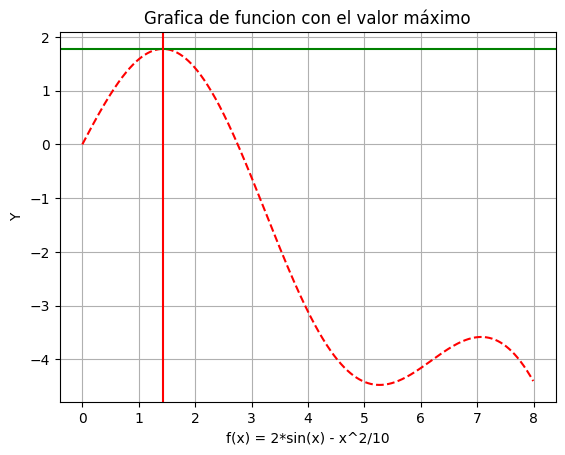

In [9]:
xl = 0
xu = 8

def graf_f():
  X = list(np.arange(xl, xu, 0.01))
  Y=[(2*math.sin(x) -(x**2)/10) for x in X]

  plt.title("Grafica de funcion con el valor máximo")
  plt.xlabel("f(x) = 2*sin(x) - x^2/10")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axhline(1.77572565314742, xmin=0, color="g")
  plt.axvline(x= 1.4275517787645942, ymin=0.0, ymax=30, color = "r")
  plt.grid()
  plt.show()

graf_f()

**Gráfica del error**

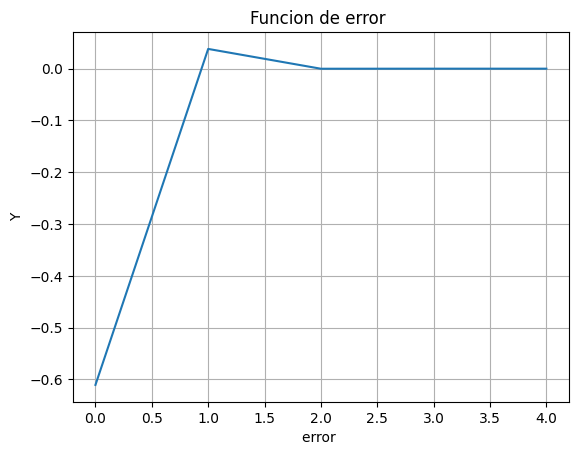

In [10]:
xl = 0
xu = 8

def graf_f():
  X = listaError
  Y = np.linspace(0, 10, num=15, endpoint=False)
  plt.title("Funcion de error ")
  plt.xlabel("error ")
  plt.ylabel("Y")
  plt.plot(X)
  plt.grid()
  plt.show()
graf_f()